In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('D:\\ANALYTICS\\GREAT LEARNING\\20.Predictive Modelling-Week-4\\cubic_zirconia.csv')

In [3]:
df.drop(df.columns[[0]],axis=1,inplace=True)

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
df.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


There are maximum of 26967 entries,we could see nearly 700 missing entries in column <b>depth</b>.  
We could either drop them or impute values depending on the categories.

In [7]:
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


<b>Cut,Clarity and Color being the categorical variables of type ordinal and rest are numerical nature  
price being the target variable</b>

In [8]:
df.describe(include=['O'])

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


<b>As mentioned in Data Dictionary we could see cut has 5 categories of which 'Ideal' is the most common  
clarity has only 8 categories opposed to the 11 categories given in dictionary in which 'SI1' is the most category  
color has 7 types, of which category 'G' being the most common</b>

In [9]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

As expected there are 697 null values for column <b>depth</b>

In [10]:
df['depth'].mean()

61.745146555006194

In [11]:
df['depth'].median()

61.8

We could see both median and mean are good candidates for imputing null values,here we take <b>median</b>  
to impute null values

In [12]:
df['depth'].fillna(df['depth'].median(),inplace=True)

In [13]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [14]:
dups=df.duplicated()
df[dups]

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


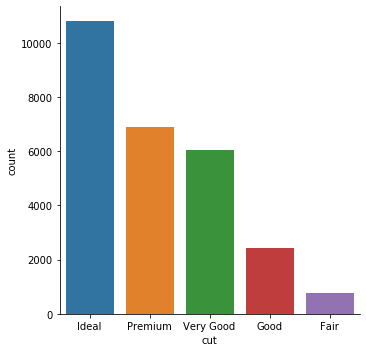

In [17]:
# g=sns.FacetGrid(df,col='cut')
# g.map(plt.hist,'price')
sns.catplot(x='cut',data=df,kind='count')

We could see from sample that 'Ideal' category is the most popular.

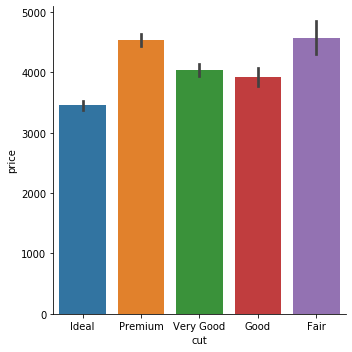

In [18]:
sns.catplot(x='cut',y='price',data=df,kind='bar')

We could see 'Ideal' category has lowest mean price while category 'Premium' and 'Fair' fetches max price.

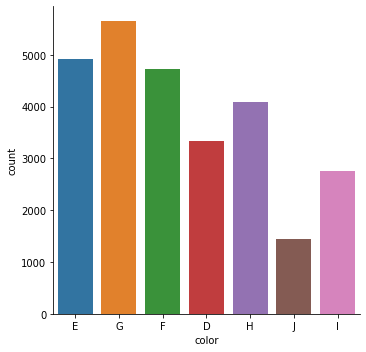

In [19]:
sns.catplot(x='color',data=df,kind='count')

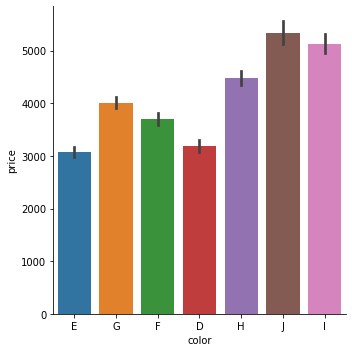

In [20]:
sns.catplot(x='color',y='price',data=df,kind='bar')

1.It is surprising to note that eventhough 'J' category being the worst of all it fetches maximum prize,this can be either  
due to small no of observations(compared to other categories) belonging to 'J' category in sample dataset , it would'nt have   captured all variations,presence of outlier might be a reason  
2.Category 'G' has the highest no of observations in the sample(can be assumed as most popular).

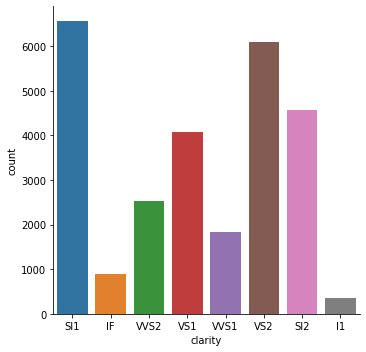

In [21]:
sns.catplot(x='clarity',data=df,kind='count')

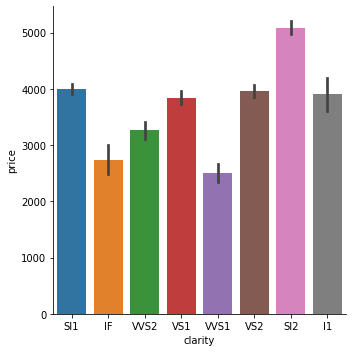

In [22]:
sns.catplot(x='clarity',y='price',data=df,kind='bar')

1.'SI1' level is the most popular in sample dataset followed by VS2  
2.'SI2' has the highest mean price followed by VS2,VS1 and SI1,again it is surprising eventhough 'IF' represents close to   
flawlessness it doesnt show a good mean price(again may be due to the low no of observations in sample dataset)

In [17]:
X=df.loc[:,['carat','depth','table','x','y','z','price']]

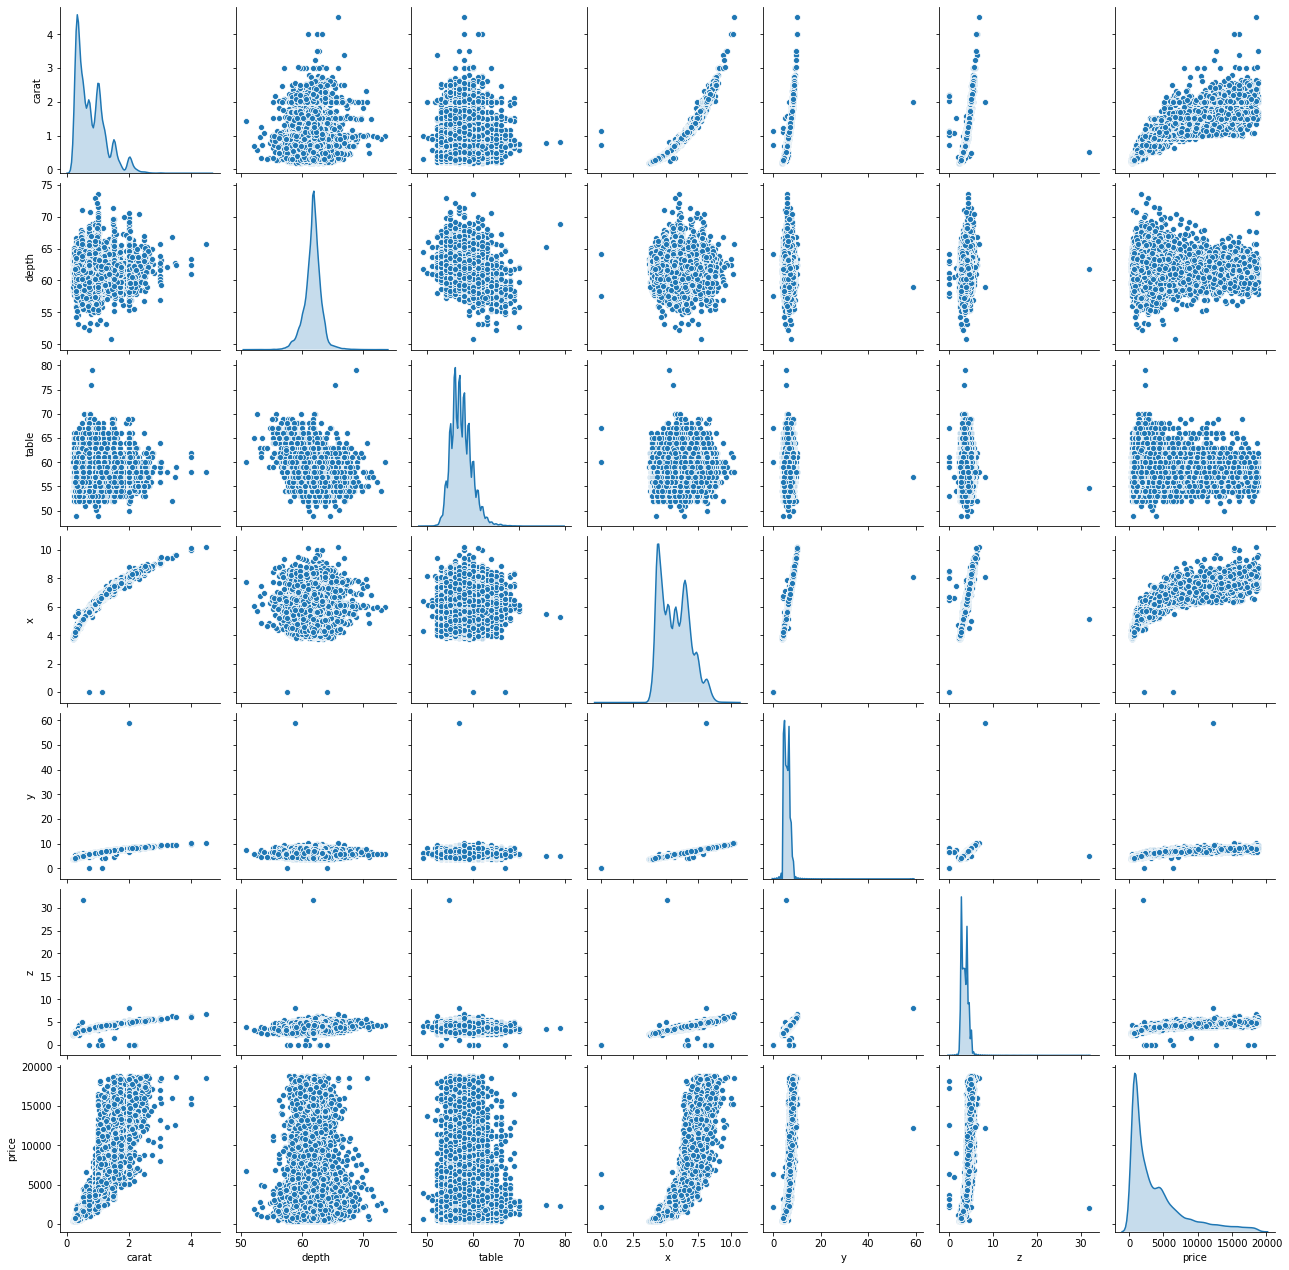

In [18]:
#Without dependent variables
sns.pairplot(X,diag_kind='kde')

We could see there is a slight collinearity between variables <b>'carat','x','y' and 'z'</b>.

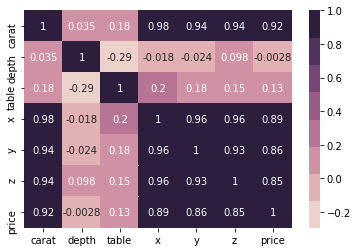

In [19]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap=sns.cubehelix_palette(8))

We could see there is a significant interaction between independent variables('price','x','y','z'),in fact their relationship  
strength is much more than what they have with dependent variable 'price'.

From above analysis we could conclude that dimensions 'x','y','z' and 'carat' has high correlation.These 4 attributes  
indicates dimensions of the Zirconium gem.x,y,z together contributes volume of the gem and carat contributes to weight per  
cubic centimeter of the Zirconium gem.Since 'carat' column already relates to volume of the gem,we could remove the attributes x,y,z from the dataset before applying the model. 


Also note 'zero' check for any columns can also be neglected since zeros were present only in x,y,z which are planned to be removed.

In [20]:
#Calculating VIF before droppping x,y,z
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [22]:
i=0
for column in X.columns:
    if i < 9:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 108.29934748518741
depth ---> 498.3851614365397
table ---> 494.46561298008595
x ---> 1035.64105461622
y ---> 347.4142237480706
z ---> 331.3040881769288
price ---> 13.514137970383704


In [23]:
#removing x,y,z
#df_bkup=df.copy()
df.drop(['x','y','z'],axis=1,inplace=True)

In [24]:
X=df.loc[:,['carat','depth','table']]

In [25]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [26]:
i=0
for column in X.columns:
    if i < 9:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 3.8883440393836586
depth ---> 397.07116631563446
table ---> 404.43532601778907


VIF factor significantly dropped, eventhough depth and table has significant VIF we could include in our model creation  
since these 2 represents crucial aspects of a gem , since it enhances the brilliance of gems by refracting entering  
light rays

In [27]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.30,Ideal,E,SI1,62.1,58.0,499
1,0.33,Premium,G,IF,60.8,58.0,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6289
3,0.42,Ideal,F,VS1,61.6,56.0,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,779


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   price    26933 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 2.9+ MB


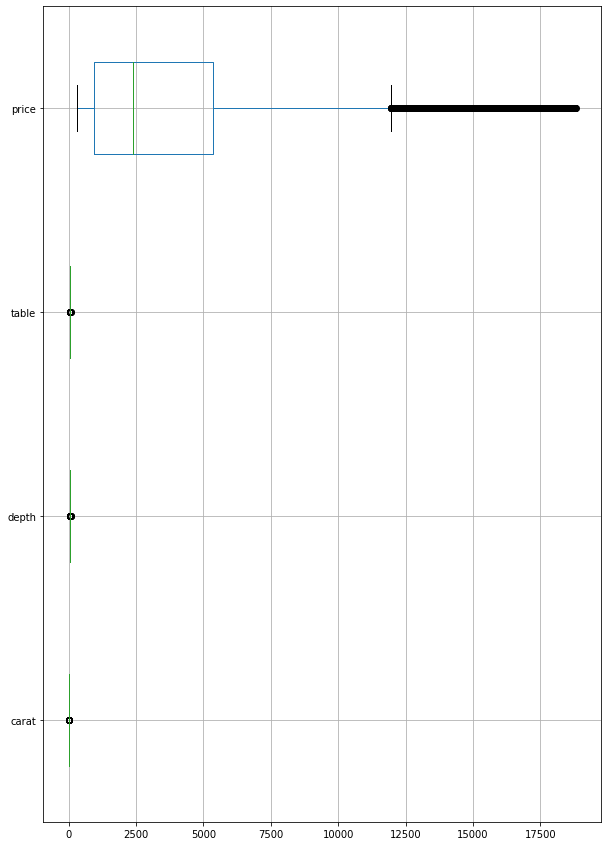

In [29]:
plt.figure(figsize=(10,15))
df.boxplot(vert=0)

Presence of outlier , we could treat them  
  

In [37]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [38]:
for column in df.iloc[:,0:6].columns:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

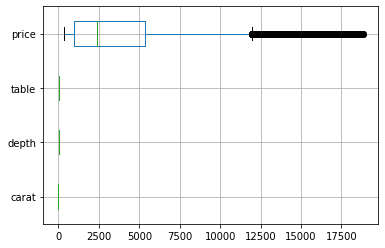

In [39]:
df.boxplot(vert=0)

In [40]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.30,Ideal,E,SI1,62.1,58.0,499
1,0.33,Premium,G,IF,60.8,58.0,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6289
3,0.42,Ideal,F,VS1,61.6,56.0,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,779


In [41]:
from sklearn import preprocessing

In [42]:
LE=preprocessing.LabelEncoder()

In [43]:
df['cut']=LE.fit_transform(df['cut'])
df['color']=LE.fit_transform(df['color'])
df['clarity']=LE.fit_transform(df['clarity'])

In [44]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.30,2,1,2,62.1,58.0,499
1,0.33,3,3,1,60.8,58.0,984
2,0.90,4,1,7,62.2,60.0,6289
3,0.42,2,2,4,61.6,56.0,1082
4,0.31,2,2,6,60.4,59.0,779


Since categorical variables are ordinal in nature we use LabelEncoder

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int32  
 2   color    26933 non-null  int32  
 3   clarity  26933 non-null  int32  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   price    26933 non-null  int64  
dtypes: float64(3), int32(3), int64(1)
memory usage: 2.6 MB


In [76]:
X=df.drop('price',axis=1)
y=df[['price']]

In [47]:
print(X.info())
print('*'*41)
print(y.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int32  
 2   color    26933 non-null  int32  
 3   clarity  26933 non-null  int32  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
dtypes: float64(3), int32(3)
memory usage: 2.4 MB
None
*****************************************
0     499
1     984
2    6289
3    1082
4     779
Name: price, dtype: int64


In [48]:
import statsmodels.formula.api as smf

In [49]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [52]:
X_train.head()

,carat,cut,color,clarity,depth,table
22114,0.34,4,4,5,62.4,60.0
2275,0.30,2,1,5,61.2,55.0
19183,0.50,2,3,2,62.5,57.0
5030,1.10,1,1,3,63.3,56.0
25414,1.02,3,2,3,61.1,62.0


In [53]:
X_test.head()

,carat,cut,color,clarity,depth,table
16997,1.26,3,5,2,60.5,62.0
24457,0.90,4,3,5,59.0,59.0
16612,1.37,2,2,4,59.6,57.0
308,0.84,1,3,4,63.6,57.0
26652,2.00,4,6,5,60.8,62.0


In [54]:
std_sc=preprocessing.StandardScaler()

In [55]:
X_train=pd.DataFrame(std_sc.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_test=pd.DataFrame(std_sc.transform(X_test),columns=X_test.columns,index=X_test.index)

In [56]:
X_train.head()

,carat,cut,color,clarity,depth,table
22114,-0.983742,1.409082,0.819083,0.672209,0.537882,1.194109
2275,-1.070676,-0.551900,-0.941779,0.672209,-0.453630,-1.127570
19183,-0.636006,-0.551900,0.232129,-1.067016,0.620508,-0.198899
5030,0.668006,-1.532391,-0.941779,-0.487274,1.281516,-0.663234
25414,0.494138,0.428591,-0.354825,-0.487274,-0.536256,2.122780


In [57]:
X_test.head()

,carat,cut,color,clarity,depth,table
16997,1.015743,0.428591,1.406037,-1.067016,-1.032012,2.122780
24457,0.233335,1.409082,0.232129,0.672209,-2.271402,0.729773
16612,1.254811,-0.551900,-0.354825,0.092467,-1.775646,-0.198899
308,0.102934,-1.532391,0.232129,0.092467,1.529394,-0.198899
26652,2.624024,1.409082,1.992991,0.672209,-0.784134,2.122780


Scaling done to bring all variables to the same scale and no variables gets a bigger weightage depending on the scale.

In [58]:
reg_model=LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
form='price~carat+cut+color+clarity+depth+table'
X1=pd.concat([X_train,y_train],axis=1)

In [60]:
X1.head()

,carat,cut,color,clarity,depth,table,price
22114,-0.983742,1.409082,0.819083,0.672209,0.537882,1.194109,537
2275,-1.070676,-0.551900,-0.941779,0.672209,-0.453630,-1.127570,844
19183,-0.636006,-0.551900,0.232129,-1.067016,0.620508,-0.198899,1240
5030,0.668006,-1.532391,-0.941779,-0.487274,1.281516,-0.663234,4065
25414,0.494138,0.428591,-0.354825,-0.487274,-0.536256,2.122780,4057


In [61]:
lm1=smf.ols(formula=form,data=X1).fit()
lm1.params

Intercept    3934.007532
carat        3985.146094
cut            76.547364
color        -456.515819
clarity       527.885433
depth        -131.731192
table        -221.649938
dtype: float64

In [63]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[0][idx]))

The coefficient for carat is 3985.146093807489
The coefficient for cut is 76.54736360770006
The coefficient for color is -456.5158193927552
The coefficient for clarity is 527.8854329103293
The coefficient for depth is -131.73119189765282
The coefficient for table is -221.64993751394275


In [64]:
reg_model.intercept_

array([3934.00753196])

In [65]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 2.350e+04
Date:                Sat, 16 May 2020   Prob (F-statistic):               0.00
Time:                        19:20:09   Log-Likelihood:            -1.6301e+05
No. Observations:               18853   AIC:                         3.260e+05
Df Residuals:                   18846   BIC:                         3.261e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3934.0075     10.028    392.320      0.0

In [66]:
reg_model.score(X_train,y_train)

0.8821207516806548

In [67]:
reg_model.score(X_test,y_test)

0.8869634811910783

In [68]:
import math

In [69]:
y_pred=reg_model.predict(X_test)

In [71]:
rmse=np.mean((y_pred-y_test)**2)

In [72]:
math.sqrt(rmse)

1362.548073717562

We could see an  root square error between prediction and actuals vary about 1362

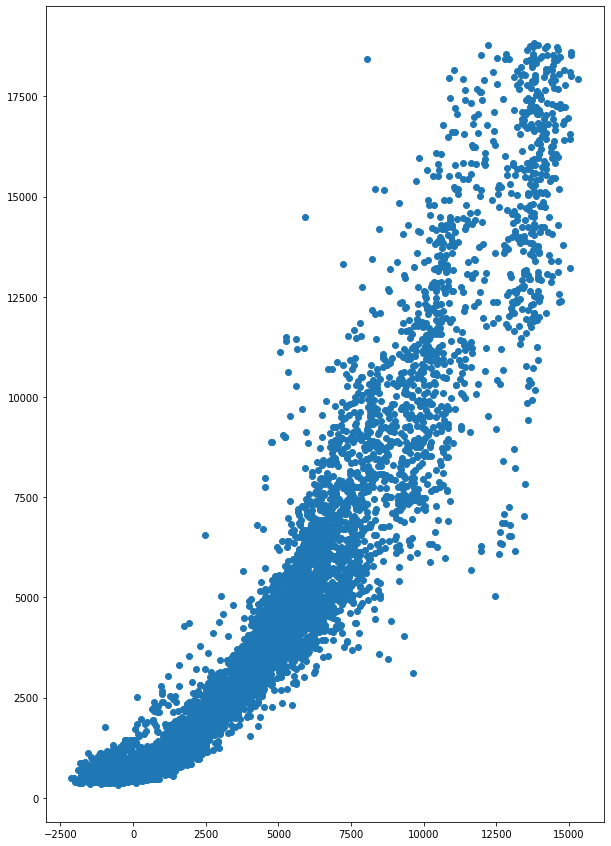

In [82]:
plt.figure(figsize=(10,15))
plt.scatter(y_pred,y_test['price'])

As we could see major proportions of data points predicted lie around straight line

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}